In [153]:
%%html
<style>

#notebook-container {
    width: 100%;
    background-color: #EEE
}

.code_cell {
   flex-direction: row !important;
}

.code_cell .output_wrapper {
    width: 100%;
    background-color: #FFF;
}

.code_cell .input {
    width: 30%;
    background-color: #FFF
}

.code_cell .output {
    width: 100%;
    background-color: #FFF;
    flex-direction: row
}

</style>

In [124]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets
from IPython.display import Javascript, display, Image, clear_output
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


In [125]:
def getting_dataframes(path):
    movies = pd.read_csv(path  + 'movies.csv')
    ratings = pd.read_csv(path + 'ratings.csv')
    df_merged = pd.merge(movies, ratings)
    print('Quantas avaliações temos? ', len(ratings), '\nE quantos filmes ao todo? ', len(movies))
    
    ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on='movieId' )

    movie_by_user = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
    
    return ratings, df_merged, movie_by_user

In [126]:
def most_common(df, group):
    df[group].to_csv('test.txt', header=False, index=False)

    common = open("test.txt", 'r')
    common = common.read()
    common = common.replace('\n','|').split('|')
    common = pd.DataFrame(common)
    return common

In [127]:
def getting_and_plotting_genres(dataframe, df_merged):

    genres = most_common(df_merged, 'genres')[:-1]

    generos = list(genres[0].values)

    genres_to_plot = pd.DataFrame({'title': genres[0].value_counts().keys(), 'count': genres[0].value_counts().values})

    fig = plt.figure(1, figsize=(9,6.5))
    ax2 = fig.add_subplot(2,1,2)
    y_axis = genres_to_plot.iloc[:,1]
    x_axis = genres_to_plot.index
    x_label = genres_to_plot.iloc[:,0]
    plt.xticks(rotation=85, fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xticks(x_axis, x_label)
    plt.ylabel("Ocorrências", fontsize = 24, labelpad = 0)
    ax2.bar(x_axis, y_axis, align = 'center')
    plt.title("Popularidade dos gêneros",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)

    plt.show()
    
    return genres[0].value_counts().keys()[:8]

In [128]:
def dummizing_dataframe(dataframe, generos):
    for item in generos:
        dataframe.loc[dataframe['genres'].str.contains(item, na = False), item] = 1
        dataframe.loc[item] = dataframe[item].fillna(0)
        
    dataframe.iloc[:,6:] = dataframe.iloc[:,6:].fillna(0).astype('int')
    dataframe = dataframe.dropna()
    return dataframe    

In [129]:
def averaging_genre_by_user(genres, dataframe):
    
    user_ratings = pd.DataFrame()
    for item in genres:
        temp = dataframe[dataframe['genres'].str.contains(item)]
        temp = temp[['userId', 'rating']].groupby(['userId']).mean().round(2)
        user_ratings = pd.concat([user_ratings, temp], axis = 1)


    columns = []    
    for nome in genres:
        columns.append('media_' + nome)

    user_ratings.columns = columns    
    
    return user_ratings    

In [130]:
def averaging_dummmized_movies(genres, dataframe):
    
    movie_ratings = pd.DataFrame()
    for item in genres:
        temp = dataframe[dataframe['genres'].str.contains(item)]
        temp = temp[['title', 'rating'] + list(genres)].groupby(['title']).mean().round(2)
        movie_ratings = pd.concat([movie_ratings, temp], axis = 0)

    movie_ratings = movie_ratings.loc[~movie_ratings.index.duplicated(keep='first')]
    
    return movie_ratings

In [131]:
def evaluating_genres_correlation(dataframe):
    
    import statsmodels.formula.api as smf

    dataframe = dataframe.rename(columns={"media_Sci-Fi": "media_SciFi"})
    
    print('Correlação entre os gêneros:\n')
    
    display(dataframe.corr())
    
    print('Regressão Logística tendo media_Drama como variável alvo:\n')

    reg_user = smf.ols('media_Drama ~ media_Comedy + media_Thriller + media_Action + media_Romance + media_Adventure + media_Crime + media_SciFi', data = dataframe).fit()
    
    print(reg_user.summary())
        
    print('\n')
    
    print('Regressão Logística tendo media_SciFi como variável alvo:\n')
    
    reg_user = smf.ols('media_SciFi ~ media_Comedy + media_Thriller + media_Action + media_Romance + media_Adventure + media_Crime + media_Drama', data = dataframe).fit()
    
    print(reg_user.summary())
    
    print('\n')
    
    print('Regressão Logística tendo media_Action como variável alvo:\n')
    
    reg_user = smf.ols('media_Action ~ media_Comedy + media_Thriller + media_SciFi + media_Romance + media_Adventure + media_Crime + media_Drama', data = dataframe).fit()
    
    print(reg_user.summary())
    
    print('\n')
    
    print('Regressão Logística tendo media_Comedy como variável alvo:\n')
    
    reg_user = smf.ols('media_Comedy ~ media_Action + media_Thriller + media_SciFi + media_Romance + media_Adventure + media_Crime + media_Drama', data = dataframe).fit()
    
    print(reg_user.summary())
    
    print('\n')
    
    print('Regressão Logística tendo media_Romance como variável alvo:\n')
    
    reg_user = smf.ols('media_Romance ~ media_Comedy + media_Thriller + media_SciFi + media_Action + media_Adventure + media_Crime + media_Drama', data = dataframe).fit()
    
    print(reg_user.summary())
    
    print('\n')
    
    print('Regressão Logística tendo media_Thriller como variável alvo:\n')
    
    reg_user = smf.ols('media_Thriller ~ media_Comedy + media_Action + media_SciFi + media_Romance + media_Adventure + media_Crime + media_Drama', data = dataframe).fit()
    
    print(reg_user.summary())
    
    print('\n')
    
    print('Regressão Logística tendo media_Adventure como variável alvo:\n')
    
    reg_user = smf.ols('media_Adventure ~ media_Comedy + media_Thriller + media_SciFi + media_Romance + media_Action + media_Crime + media_Drama', data = dataframe).fit()
    
    print(reg_user.summary())
    
    

### Primeira função geral

In [132]:
def analysing_dataframes(path):

    ratings,df_merged, movie_by_user = getting_dataframes(path) # load dataframes and do transformations to allow for analysis 
    
    common_users = most_common(ratings, 'userId')
    
    generos = getting_and_plotting_genres(common_users, df_merged) # plot distribution of genres in dataframe

    df_merged = dummizing_dataframe(df_merged, generos) # get dummies for each genre in each movie
    
    user_ratings = averaging_genre_by_user(generos, df_merged) # get average rating for genre by user

    movie_ratings = averaging_dummmized_movies(generos, df_merged) # get average rating for each movie

    evaluating_genres_correlation(user_ratings) # logistic regression to analyse correlations between genres
    
    return common_users, movie_by_user, movie_ratings, user_ratings

In [133]:
def votes_evaluation(movie_by_user, movie_ratings, user_ratings):
    
    counter = user_ratings.index.astype(int)

    not_seen_dict = {}

    seen_dict = {}

    for n in range(len(counter)):

        id_n = int(counter[int(n)])

        nan_movies = movie_by_user.loc[int(id_n),:].isna()

        nan_movies = nan_movies[nan_movies == True]

        movies_seen = [x for x in movie_by_user.columns if x not in nan_movies]

        seen_dict[id_n] =  list(movies_seen)

        not_seen_dict[id_n] =  list(nan_movies.index)

        lista_cont = movie_ratings[movie_ratings.index.isin(movies_seen)].iloc[:,1:].sum() 

        user_ratings.iloc[int(id_n)-1,:] = np.array((user_ratings.iloc[int(id_n)-1,:].values.T*lista_cont)/max(lista_cont))

    return seen_dict, not_seen_dict,user_ratings

In [134]:
def similarity_eval(user_ratings, id_n):
    
    user_ratings = user_ratings.apply(lambda row: row.fillna(row.mean()), axis=1)

    cosine = cosine_similarity(user_ratings)
    
    np.fill_diagonal(cosine, 0 )
    similarity_with_user =pd.DataFrame(cosine,index=user_ratings.index)
    similarity_with_user.columns=user_ratings.index
    
    most_related_users = similarity_with_user.iloc[id_n-1,:]
    most_related_users = most_related_users.sort_values(ascending = False)[most_related_users>0.8]
    
    return most_related_users

In [135]:
def recommending(most_related_users, movie_by_user, not_seen_dict, id_n, boolean = False):    

    movies_to_watch = []
    movies_to_def_watch = []

    movie_by_related_user = movie_by_user[movie_by_user.index.isin(list(most_related_users.index))]
    movie_means_for_related_user = movie_by_related_user.iloc[:,:].mean()[movie_by_related_user.iloc[:,:].mean().notnull()]
    movies_to_watch = movie_means_for_related_user[(movie_means_for_related_user>4) & (movie_means_for_related_user<4.81)]
    movies_to_def_watch = movie_means_for_related_user[movie_means_for_related_user>4.8]

    print("Out of " + str(len(not_seen_dict[id_n])) + " movies, " + str(len(movies_to_watch)) + " fits the user's taste.\n")
    
    print("From users with similar taste, " + str(len(movies_to_def_watch)) + " movies were found to be greatly enjoyed by a lot of them: \n")
    print("\n".join(list(movies_to_def_watch.index)))
    
    if boolean is False:
        return movies_to_watch, must_watch

### Segunda função geral

In [136]:
def recommendation(n, movie_by_user, movie_ratings, user_ratings):
    
    seen_dict, not_seen_dict,user_ratings = votes_evaluation(movie_by_user, movie_ratings, user_ratings)
    
    id_n = int(user_ratings.reset_index().loc[n,'userId']) # get user n's id
    
    most_related_users = similarity_eval(user_ratings, id_n)
    
    return recommending(most_related_users, movie_by_user, not_seen_dict, id_n, True)


In [137]:
def get_most_watched(movie_by_user):
    movie_count = movie_by_user.copy()
    movie_count.fillna(0, inplace = True)
    movie_count = pd.DataFrame(np.where(movie_count!=0,1,0), index = movie_by_user.index, columns = movie_by_user.columns)
    most_watched = movie_count.sum(axis=0).sort_values()
    return most_watched.reset_index()

In [138]:
def profile(movie_name, movie_by_user, rate, most_watched):

    rate_list = [rate-1,rate,rate+1]
    
    movie_same_rate = movie_by_user[movie_by_user[movie_name].isin(rate_list)].index
    
    movie_means_for_related_user = movie_by_user.loc[movie_same_rate,:].mean()[movie_by_user.loc[movie_same_rate,:].mean().notnull()]

    
    movie_means_for_related_user = movie_means_for_related_user[((movie_means_for_related_user>rate-1.2) & (movie_means_for_related_user<rate+1.2)) | (movie_means_for_related_user<1.5) | (movie_means_for_related_user>4.5)]
        
#     for title in movie_means_for_related_user.index[1:]:
#         if isinstance(movie_by_user.loc[movie_same_rate,:][title], np.float64):
#             movie_means_for_related_user = movie_means_for_related_user.drop(title)
#         elif len(movie_by_user.loc[movie_same_rate,:][movie_by_user.loc[movie_same_rate,:][title].notnull()]) <round(len(movie_same_rate)*0.3):
#             movie_means_for_related_user = movie_means_for_related_user.drop(title)
        
    
    most_similar = movie_means_for_related_user.reset_index()
    most_similar.rename(columns = {0:'rates'}, inplace = True)
    watches = get_most_watched(movie_by_user.loc[:,movie_by_user.columns.isin(most_similar['title'])])

    
    watches.rename(columns = {0:'count'}, inplace = True)
    most_similar = most_similar.merge(watches, on = 'title')

    
    most_similar = most_similar.sort_values(['count','rates'], ascending = False)
    
    most_similar = most_similar[~most_similar['title'].isin(most_watched)][::5]
    
    if len(most_similar)>5:
        most_similar = most_similar.iloc[-25:,:]['title']
    else:
        most_similar = most_similar['title']
        
    return list(most_similar)

In [148]:
def run_checkbox_1(ev):
    display(Javascript('IPython.notebook.execute_cells([26])'))
    clear_output(wait=True)
    display(Image(filename='arrow_down.png'))

In [140]:
def run_checkbox_2(ev):
    display(Javascript('IPython.notebook.execute_cells([25])'))
    clear_output(wait=True)
    display(Image(filename='arrow_up.png'))

In [141]:
def request(most_rated):

    names = []
    checkbox_objects = []
    for i in most_rated:
        checkbox_objects.append(widgets.Checkbox(value=False, description=i))
        names.append(i)  

    arg_dict = {names[i]: checkbox for i, checkbox in enumerate(checkbox_objects)}

    widget = widgets.VBox(children=checkbox_objects)
    
    button = widgets.Button(description="Go")
    button.on_click(run_checkbox_1)
    
    #button2 = widgets.Button(description="Stop")
    #button2.on_click(run_recommendation)

    display(widget, button)
    
    return widget

In [142]:
def rating(lista):
    temp_dict = {}
    i = 0
    while i < len(lista):
        rate = input('From 1 to 5, what would be your rate for ' + lista[i] + ':')
        print('\n')
        time.sleep(.6)
        clear_output(wait=True)
        try:
            temp = float(rate)
        except:
            print('Not a valid rate. Try again.')
            continue
        temp_dict[lista[i]] = float(rate)
        i +=1
    return temp_dict

Quantas avaliações temos?  100004 
E quantos filmes ao todo?  9125


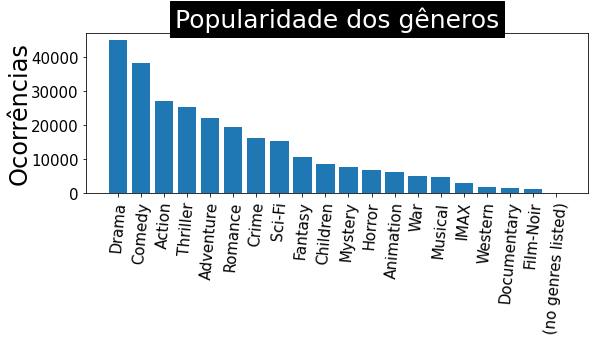

Correlação entre os gêneros:



,media_Drama,media_Comedy,media_Action,media_Thriller,media_Adventure,media_Romance,media_Crime,media_SciFi
media_Drama,1.000000,0.697513,0.609334,0.697694,0.640897,0.704835,0.685143,0.544054
media_Comedy,0.697513,1.000000,0.641474,0.615499,0.680507,0.762898,0.573498,0.542868
media_Action,0.609334,0.641474,1.000000,0.764011,0.777698,0.542753,0.584300,0.769571
media_Thriller,0.697694,0.615499,0.764011,1.000000,0.632715,0.565676,0.722991,0.685652
media_Adventure,0.640897,0.680507,0.777698,0.632715,1.000000,0.576509,0.462371,0.752942
media_Romance,0.704835,0.762898,0.542753,0.565676,0.576509,1.000000,0.472190,0.482042
media_Crime,0.685143,0.573498,0.584300,0.722991,0.462371,0.472190,1.000000,0.498636
media_SciFi,0.544054,0.542868,0.769571,0.685652,0.752942,0.482042,0.498636,1.000000


Regressão Logística tendo media_Drama como variável alvo:

                            OLS Regression Results                            
Dep. Variable:            media_Drama   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     234.9
Date:                Fri, 08 Jan 2021   Prob (F-statistic):          1.58e-172
Time:                        11:56:27   Log-Likelihood:                -47.136
No. Observations:                 651   AIC:                             110.3
Df Residuals:                     643   BIC:                             146.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


Regressão Logística tendo media_Adventure como variável alvo:

                            OLS Regression Results                            
Dep. Variable:        media_Adventure   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     264.2
Date:                Fri, 08 Jan 2021   Prob (F-statistic):          1.75e-184
Time:                        11:56:27   Log-Likelihood:                -175.02
No. Observations:                 651   AIC:                             366.0
Df Residuals:                     643   BIC:                             401.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      

In [143]:
_, movie_by_user, movie_ratings, user_ratings = analysing_dataframes('ml-latest-small\.'.replace('.',''))


In [23]:
temp = []
ratings = {}
movie_by_user.loc[len(movie_by_user)] = np.nan
most_watched = list(get_most_watched(movie_by_user).iloc[-30:,:]['title'].values)

Button(description='Go', style=ButtonStyle())

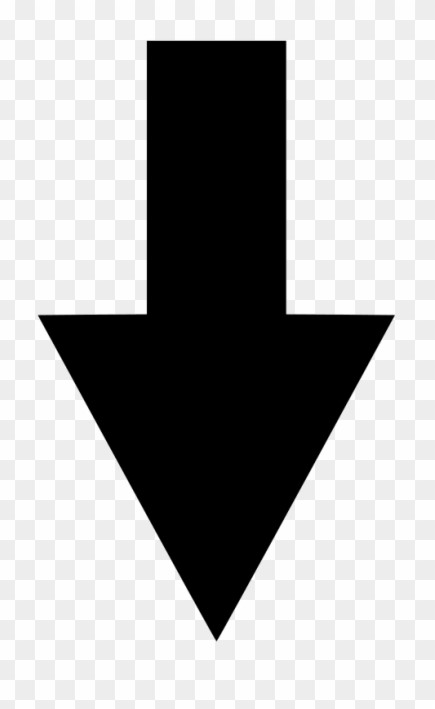

<IPython.core.display.Javascript object>

In [36]:
widget = request(most_watched)

In [37]:
selected_options = [w.description for w in widget.children if w.value]

rates = rating(selected_options)

ratings = {**rates, **ratings}

temp = temp + most_watched


similar = []
idn = len(movie_by_user)+1
for k,v in rates.items():
    movie_by_user.loc[idn,k] = v
    similar += profile(k,movie_by_user,v, temp)
    
most_watched = list(set(similar)-set(temp))


button = widgets.Button(description="Go")
button.on_click(run_checkbox_2)
display(button)

Button(description='Go', style=ButtonStyle())

In [72]:
the_seen = pd.DataFrame.from_dict(ratings, orient = 'index', columns = ['rates']).reset_index()
the_seen.rename(columns = {'index':'title'}, inplace = True)
the_seen = the_seen.merge(movie_ratings.drop('rating', axis = 1).reset_index(), on = 'title')

the_seen

,title,rates,Drama,Comedy,Action,Thriller,Adventure,Romance,Crime,Sci-Fi
0,Iron Man (2008),4.2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,WALL·E (2008),4.5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2,V for Vendetta (2006),4.5,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,Shrek 2 (2004),4.5,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,"Little Mermaid, The (1989)",4.3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,X2: X-Men United (2003),4.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
6,Harry Potter and the Chamber of Secrets (2002),4.6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,Back to the Future Part III (1990),4.5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
8,Spider-Man 2 (2004),4.5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
9,Sin City (2005),4.5,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [144]:
seen_genres = pd.DataFrame()
for item in the_seen.columns[2:]:
    temp = the_seen[the_seen[item] == 1.0]
    temp = temp[[ 'rates']].mean().round(2)
    seen_genres = pd.concat([seen_genres, temp], axis = 1)

#seen_genres.iloc[0,:] = seen_genres.iloc[0,:] - seen_genres.iloc[0,:].mean()

columns = []    
for nome in the_seen.columns[2:]:
    columns.append('media_' + nome)
    
seen_genres.columns = columns    

user_ratings.loc[len(user_ratings)+1,:]=seen_genres.values

user_ratings

D:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,media_Drama,media_Comedy,media_Action,media_Thriller,media_Adventure,media_Romance,media_Crime,media_Sci-Fi
userId,,,,,,,,
1.0,2.57,2.00,2.80,2.83,2.17,3.50,2.50,2.40
2.0,3.62,3.09,3.32,3.33,3.75,3.59,3.67,3.80
3.0,3.92,3.61,3.47,3.55,3.30,3.65,3.70,3.14
4.0,4.46,4.33,4.27,4.02,4.34,4.50,4.16,4.26
5.0,3.81,3.98,4.00,3.62,3.82,4.08,3.45,4.00
...,...,...,...,...,...,...,...,...
668.0,4.31,3.44,3.50,4.50,3.00,5.00,4.57,NaN
669.0,3.42,3.40,3.78,3.08,3.80,3.25,3.75,2.88
670.0,3.76,3.86,3.60,3.90,3.40,3.71,4.00,3.75


In [154]:
df = recommendation(len(user_ratings)-1, movie_by_user, movie_ratings, user_ratings)

Out of 9013 movies, 333 fits the user's taste.

From users with similar taste, 108 movies were found to be greatly enjoyed by a lot of them: 

3:10 to Yuma (2007)
7th Voyage of Sinbad, The (1958)
About Time (2013)
Above the Law (1988)
African Queen, The (1951)
American Ninja (1985)
American Ninja 3: Blood Hunt (1989)
Aristocrats, The (2005)
Armour of God (Long xiong hu di) (1987)
Arsenic and Old Lace (1944)
Bad Company (2002)
Band of Brothers (2001)
Batman (1966)
Battle Creek Brawl (Big Brawl, The) (1980)
Brassed Off (1996)
Breakfast at Tiffany's (1961)
Carnival of Souls (1962)
Cemetery Man (Dellamorte Dellamore) (1994)
Charade (1963)
Coach Carter (2005)
Condorman (1981)
Cosmos (1980)
Court Jester, The (1956)
Crimson Pirate, The (1952)
Cypher (2002)
Dead Zone, The (1983)
Definitely, Maybe (2008)
Devil and Daniel Johnston, The (2005)
Do the Right Thing (1989)
Dracula: Dead and Loving It (1995)
Drunken Master (Jui kuen) (1978)
Eat Drink Man Woman (Yin shi nan nu) (1994)
Enforcer, The (19

#### most_rated

In [145]:
idn = len(movie_by_user)+1

for k,v in ratings.items():
    movie_by_user.loc[idn,k] = v

In [80]:
most_rated

["'Hellboy': The Seeds of Creation (2004)",
 'Ace Ventura: Pet Detective (1994)',
 'Aladdin (1992)',
 'American Beauty (1999)',
 'Apollo 13 (1995)']

In [30]:
widget = request(most_rated)

Button(description='Go', style=ButtonStyle())

In [ ]:
selected_options = [w.description for w in widget.children if w.value]



##### Podemos ver que há fortes correlações entre os gêneros.

#### content and colaborative based filter

In [ ]:
movie_by_user.columns[movie_by_user.columns.str.contains('Forrest')]

In [ ]:
movie_count = movie_by_user
movie_count.fillna(0, inplace = True)
display(movie_count)
movie_count = pd.DataFrame(np.where(movie_count!=0,1,0), index = movie_by_user.index, columns = movie_by_user.columns)